Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf

 Download historical stock data

In [2]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2022-01-01")


[*********************100%***********************]  1 of 1 completed


Create a new column for the stock's price at the next time step

In [3]:
data["Next Close"] = data["Close"].shift(-1)

Split the data into training and testing sets

In [4]:
X = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
y = data["Next Close"]

X_train = X[:-30]
X_test = X[-30:]
y_train = y[:-30]
y_test = y[-30:]

Fit the linear regression model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict the stock prices for the testing set

In [6]:
predictions = model.predict(X_test)

Plot the predicted and actual stock prices

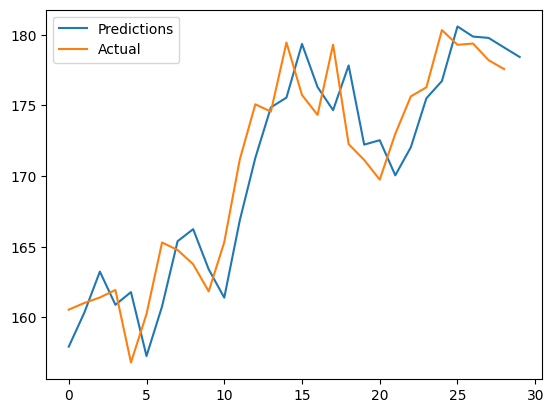

In [7]:
plt.plot(predictions, label="Predictions")
plt.plot(y_test.values, label="Actual")
plt.legend()
plt.show()